# Project Objective:

**Part I consists of building a model using neural networks as a _regressor_ to solve industry based problem.**


**Part II consists of building a model using neural networks as a _classifier_ to solve industry based problem.**

In [1]:
import numpy as np   
import pandas as pd
import os   
import csv
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from termcolor import colored
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from keras.wrappers.scikit_learn import KerasClassifier
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers,regularizers
from tensorflow.keras.layers.experimental import preprocessing

from tensorflow.python.keras.models import Sequential

from tensorflow.keras.layers import Flatten, Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

from keras.layers import Dense ,Dropout,BatchNormalization, Activation
from keras.wrappers.scikit_learn import KerasRegressor
import tensorflow as tf
import kerastuner as kt
from kerastuner.tuners import RandomSearch
#from deployml.keras import NeuralNetworkBase

print(tf.__version__)

2.4.1


In [2]:
print(colored('\x1B[1mLoading Dataset....','blue'))
df = pd.read_csv('Part- 1,2&3 - Signal.csv')

Loading Dataset....


In [3]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [4]:
df.head(10)

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


# Observations

In [5]:
print(colored('\x1B[1mGetting shape of the dataframe','blue'))
print('The data contains \nNo. of rows = ',df.shape[0],'\nNo. of columns = ',df.shape[1])

Getting shape of the dataframe
The data contains 
No. of rows =  1599 
No. of columns =  12


In [6]:
print(colored('\x1B[1mGetting size of the dataframe','blue'))
df.size

Getting size of the dataframe


19188

In [7]:
print(colored('\x1B[1mGetting unique values of column in dataframe','blue'))
print(colored('\x1B[1mColumn Name\tNo. of unique values'))

df.nunique(axis=0)

Getting unique values of column in dataframe
Column Name	No. of unique values


Parameter 1         96
Parameter 2        143
Parameter 3         80
Parameter 4         91
Parameter 5        153
Parameter 6         60
Parameter 7        144
Parameter 8        436
Parameter 9         89
Parameter 10        96
Parameter 11        65
Signal_Strength      6
dtype: int64

In [8]:
print(df['Signal_Strength'].unique())  

[5 6 7 4 8 3]


In [9]:
print(colored('\x1B[1mGetting data-types of columns','blue'))
df.dtypes

Getting data-types of columns


Parameter 1        float64
Parameter 2        float64
Parameter 3        float64
Parameter 4        float64
Parameter 5        float64
Parameter 6        float64
Parameter 7        float64
Parameter 8        float64
Parameter 9        float64
Parameter 10       float64
Parameter 11       float64
Signal_Strength      int64
dtype: object

In [10]:
print(colored('\x1B[1mChecking negative values','blue'))

for x in df.columns:
    att = df[x]
    a = att.lt(0).sum()
    if a != 0:
        print(x,'has Negative Value of',a)
    else:
        print('No Negative Value in',x)

Checking negative values
No Negative Value in Parameter 1
No Negative Value in Parameter 2
No Negative Value in Parameter 3
No Negative Value in Parameter 4
No Negative Value in Parameter 5
No Negative Value in Parameter 6
No Negative Value in Parameter 7
No Negative Value in Parameter 8
No Negative Value in Parameter 9
No Negative Value in Parameter 10
No Negative Value in Parameter 11
No Negative Value in Signal_Strength


In [11]:
print(colored('\x1B[1mGetting Nan values of column in dataframe','blue'))
print('Column Name\tNo. of Nan values')
df.isnull().sum()

Getting Nan values of column in dataframe
Column Name	No. of Nan values


Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

In [12]:
print(colored('\x1B[1mDescribing statistics of numerical features','blue'))
df.describe()

Describing statistics of numerical features


,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Univariate Analysis

Graphical represntation of columns



 Parameter 1 is Positively Skewed towards Right side of asymmetric distribution as Skewness = 0.983


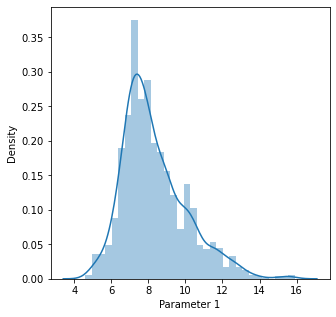


 Parameter 2 is Positively Skewed towards Right side of asymmetric distribution as Skewness = 0.672


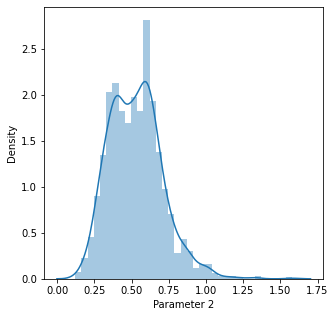


 Parameter 3 is Symmetrically Skewed as Skewness = 0.318


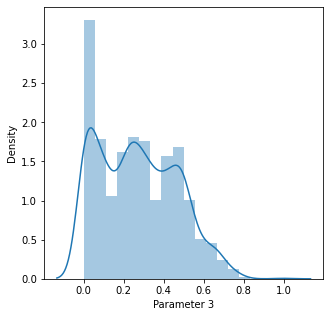


 Parameter 4 is Positively Skewed towards Right side of asymmetric distribution as Skewness = 4.541


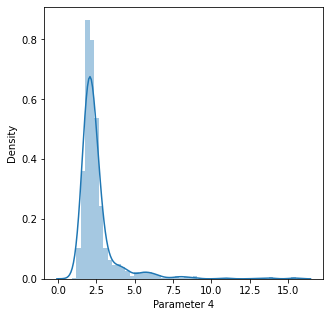


 Parameter 5 is Positively Skewed towards Right side of asymmetric distribution as Skewness = 5.68


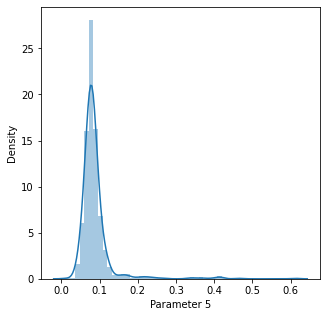


 Parameter 6 is Positively Skewed towards Right side of asymmetric distribution as Skewness = 1.251


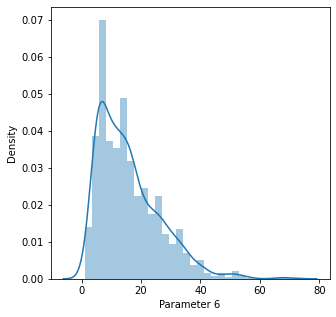


 Parameter 7 is Positively Skewed towards Right side of asymmetric distribution as Skewness = 1.516


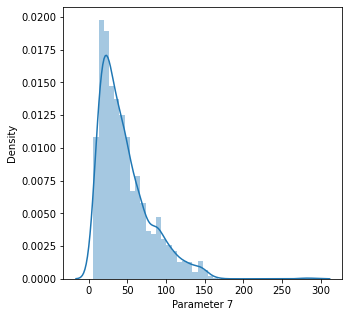


 Parameter 8 is Symmetrically Skewed as Skewness = 0.071


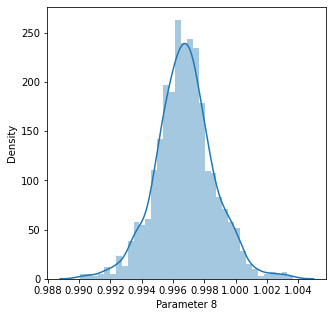


 Parameter 9 is Symmetrically Skewed as Skewness = 0.194


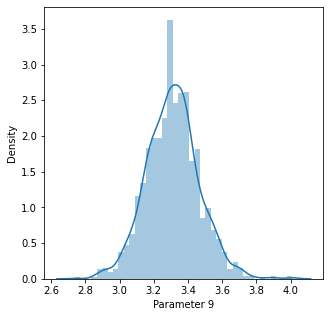


 Parameter 10 is Positively Skewed towards Right side of asymmetric distribution as Skewness = 2.429


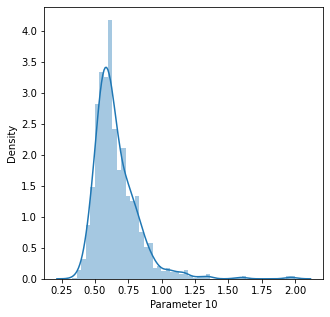


 Parameter 11 is Positively Skewed towards Right side of asymmetric distribution as Skewness = 0.861


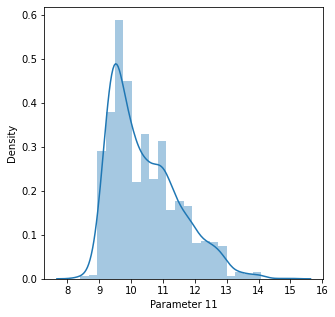


 Signal_Strength is Symmetrically Skewed as Skewness = 0.218


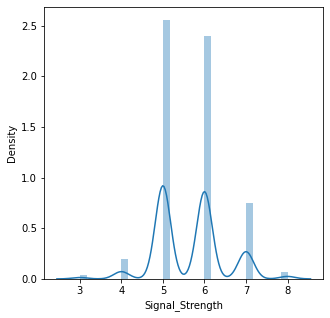

In [13]:
print(colored('\x1B[1mGraphical represntation of columns\n\n','blue'))
n=1
for x in df:
    series          = df[x]
    skewness        = series.skew()
    if skewness > -.5  and skewness < .5 :
        print('\n',x,"is Symmetrically Skewed as Skewness =",round(skewness,3))
    elif skewness > .25:
            print('\n',x,"is Positively Skewed towards Right side of asymmetric distribution as Skewness =",round(skewness,3))
    elif skewness < -.25:
            print('\n',x,"is Negatively Skewed towards Left side of asymmetric distribution as Skewness =",round(skewness,3))
    plt.figure(figsize= (5,5))
    n=n+1
    sns.distplot(df[x])
    plt.xlabel(x)
    plt.show()

### Outliers

Checking for outlier

No. of outlier of Parameter 1 in dataset is 12 
Which are [15.0, 15.0, 13.8, 14.0, 13.7, 13.7, 15.6, 14.3, 15.5, 15.5, 15.6, 15.9]


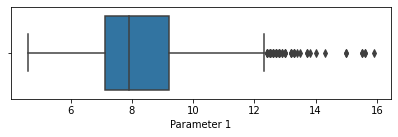


No. of outlier of Parameter 2 in dataset is 10 
Which are [1.13, 1.07, 1.33, 1.33, 1.09, 1.24, 1.185, 1.115, 1.58, 1.18]


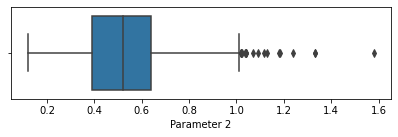


No. of outlier of Parameter 3 in dataset is 1 
Which are [1.0]


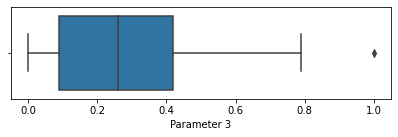


No. of outlier of Parameter 4 in dataset is 30 
Which are [10.7, 7.3, 7.2, 7.0, 11.0, 11.0, 7.9, 7.9, 15.5, 8.3, 7.9, 8.6, 7.5, 9.0, 8.8, 8.8, 8.9, 8.1, 8.1, 8.3, 8.3, 7.8, 12.9, 13.4, 15.4, 15.4, 13.8, 13.8, 13.9, 7.8]


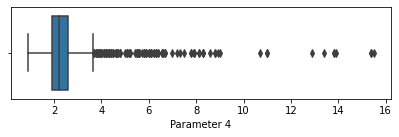


No. of outlier of Parameter 5 in dataset is 31 
Which are [0.368, 0.341, 0.332, 0.46399999999999997, 0.401, 0.467, 0.23600000000000002, 0.61, 0.36, 0.27, 0.337, 0.263, 0.611, 0.358, 0.34299999999999997, 0.413, 0.25, 0.42200000000000004, 0.387, 0.415, 0.243, 0.24100000000000002, 0.414, 0.369, 0.40299999999999997, 0.414, 0.415, 0.415, 0.267, 0.235, 0.23]


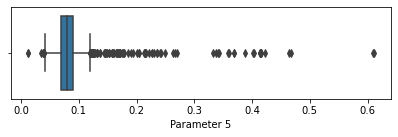


No. of outlier of Parameter 6 in dataset is 22 
Which are [52.0, 51.0, 50.0, 68.0, 68.0, 54.0, 53.0, 52.0, 51.0, 57.0, 50.0, 48.0, 48.0, 72.0, 51.0, 51.0, 52.0, 55.0, 55.0, 48.0, 48.0, 66.0]


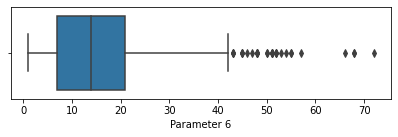


No. of outlier of Parameter 7 in dataset is 15 
Which are [148.0, 153.0, 165.0, 151.0, 149.0, 147.0, 148.0, 155.0, 151.0, 152.0, 278.0, 289.0, 160.0, 147.0, 147.0]


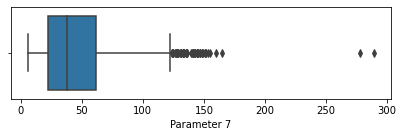


No. of outlier of Parameter 8 in dataset is 18 
Which are [1.0032, 1.0026, 1.00315, 1.00315, 1.00315, 1.0026, 0.99064, 0.99064, 1.00289, 0.9900700000000001, 0.9900700000000001, 0.9902, 0.9908, 0.9908399999999999, 1.00369, 1.00369, 1.00242, 1.00242]


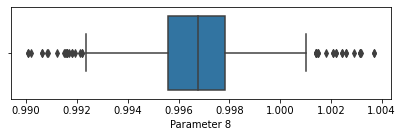


No. of outlier of Parameter 9 in dataset is 8 
Which are [3.9, 3.85, 2.74, 3.9, 3.78, 3.78, 4.01, 4.01]


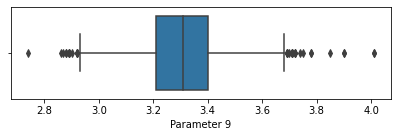


No. of outlier of Parameter 10 in dataset is 27 
Which are [1.56, 1.28, 1.2, 1.28, 1.95, 1.22, 1.95, 1.98, 1.31, 2.0, 1.59, 1.61, 1.26, 1.36, 1.18, 1.36, 1.36, 1.17, 1.62, 1.18, 1.34, 1.17, 1.17, 1.33, 1.18, 1.17, 1.17]


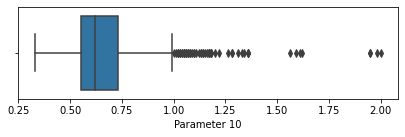


No. of outlier of Parameter 11 in dataset is 8 
Which are [14.0, 14.0, 14.0, 14.0, 14.9, 14.0, 14.0, 14.0]


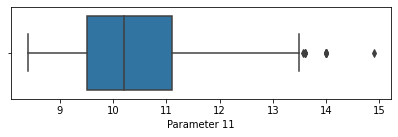


No. of outlier of Signal_Strength in dataset is 10 
Which are [3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]


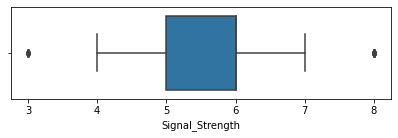

In [14]:
print(colored('\x1B[1mChecking for outlier','blue'))

n=1
for x in df:
    df[x]=df[x].astype(float)
    att = df[x]
    mean = np.mean(att) 
    std = np.std(att) 
    outlier = [] 
    outliervalue = []
    for i in att: 
        z = (i-mean)/std 
        if z < -3.00 or z > 3.00: 
            outlier.append(i) 
            outliervalue.append(z)
    print('\nNo. of outlier of',x,'in dataset is',len(outlier),'\nWhich are',outlier)
    plt.figure(figsize= (15,20))
    plt.subplot(10,2,n)
    n=n+1
    sns.boxplot(df[x])
    plt.xlabel(x)
    plt.show()
    ('\n')

 COUNT PLOT OF TARGET COLUMN


<AxesSubplot:xlabel='Signal_Strength', ylabel='count'>

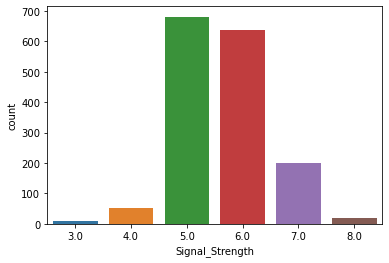

In [15]:
print(colored('\x1B[1m COUNT PLOT OF TARGET COLUMN','blue'))
sns.countplot(x='Signal_Strength',data=df)

### Bivariate Analysis

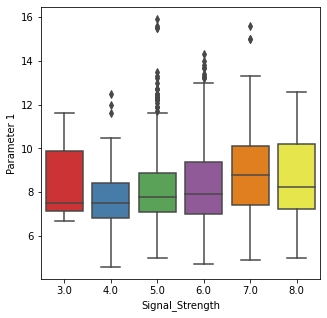

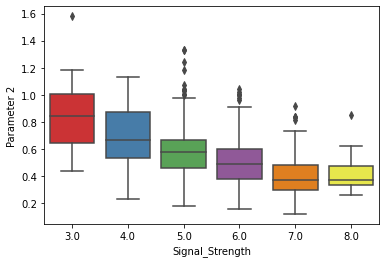

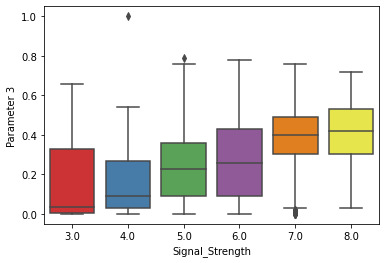

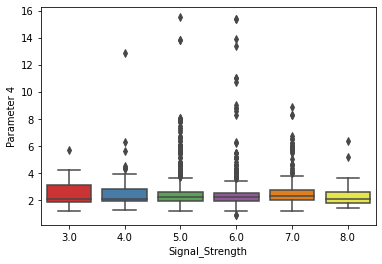

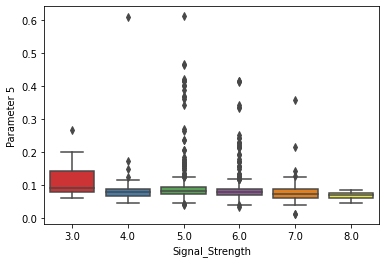

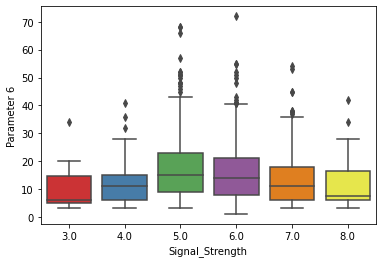

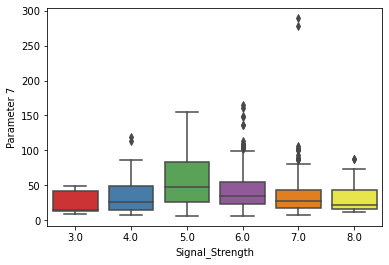

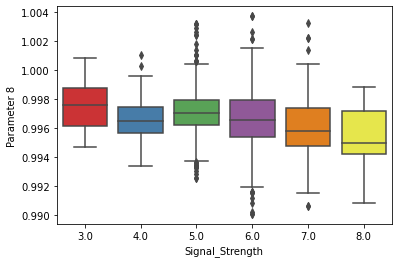

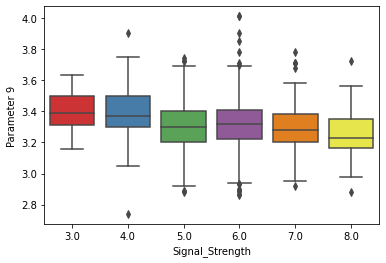

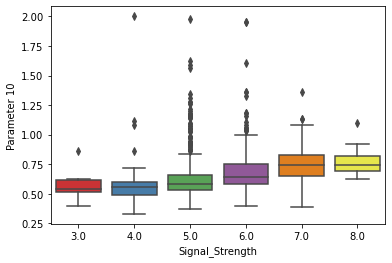

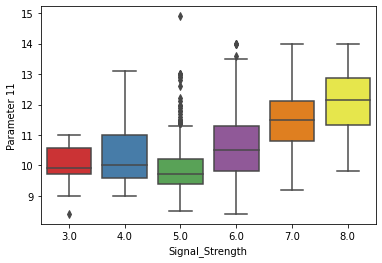

In [16]:
#Getting the target column distributions
vc1=df.drop(['Signal_Strength'],axis=1)
plt.figure(figsize= (5,5))
n=1
for i in vc1:
    vc1[i]=vc1[i].astype(float)
    att = vc1[i]
    sns.boxplot(x='Signal_Strength',y=i,data=df,palette="Set1")
    plt.show()

<Figure size 360x360 with 0 Axes>

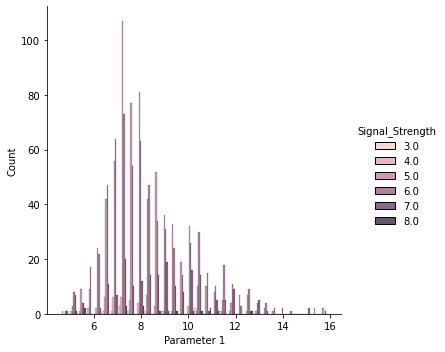

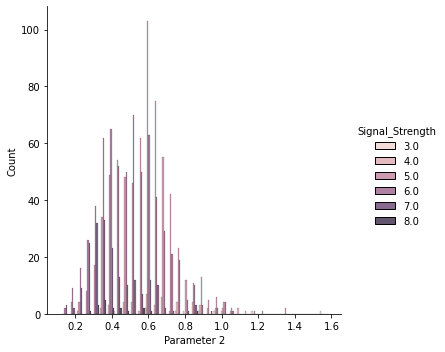

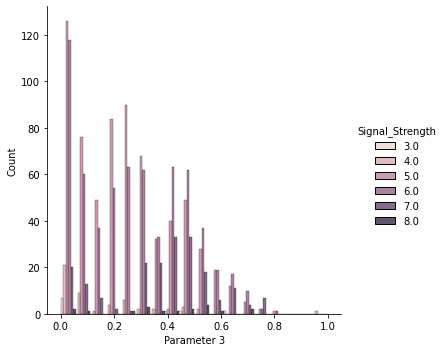

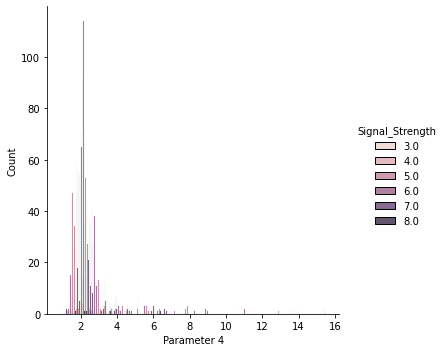

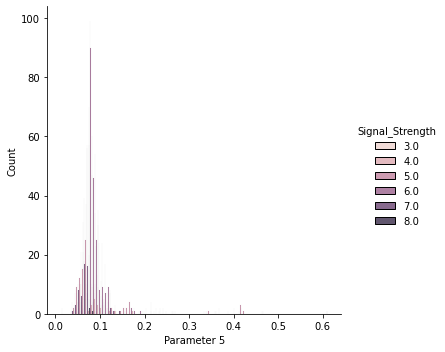

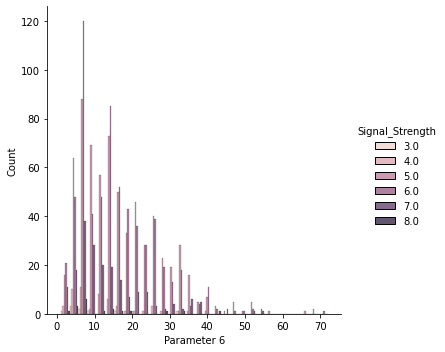

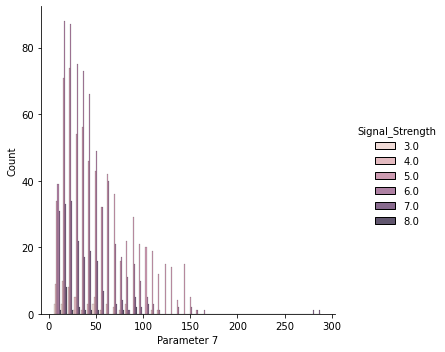

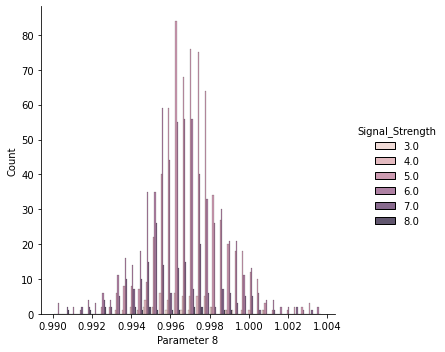

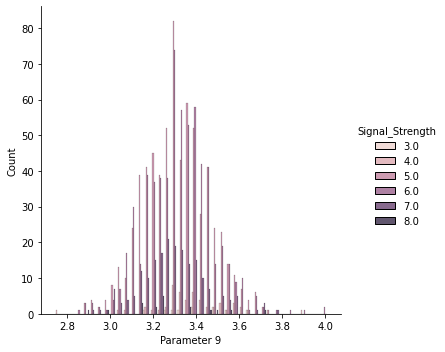

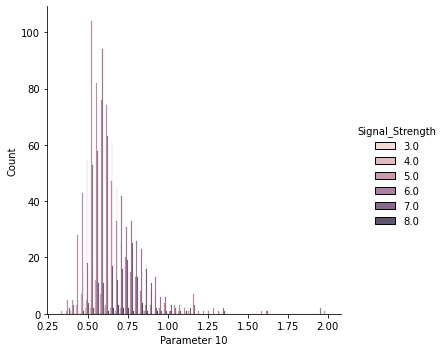

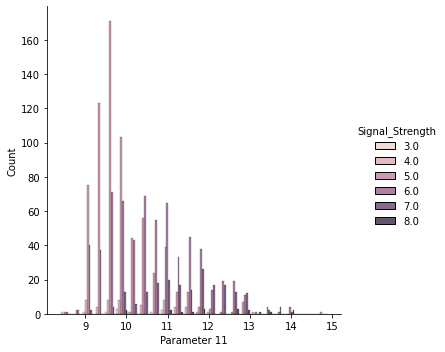

In [17]:
#Getting the target column distributions
vc1=df.drop(['Signal_Strength'],axis=1)
plt.figure(figsize= (5,5))
n=1
for i in vc1:
    vc1[i]=vc1[i].astype(float)
    att = vc1[i]
    #sns.boxplot(x='Signal_Strength',y=i,data=df,palette="Set1")
    #sns.displot(penguins, x="flipper_length_mm", hue="sex", multiple="dodge")
    sns.displot(hue='Signal_Strength',x=i,data=df, multiple="dodge")

    plt.show()

<Figure size 360x360 with 0 Axes>

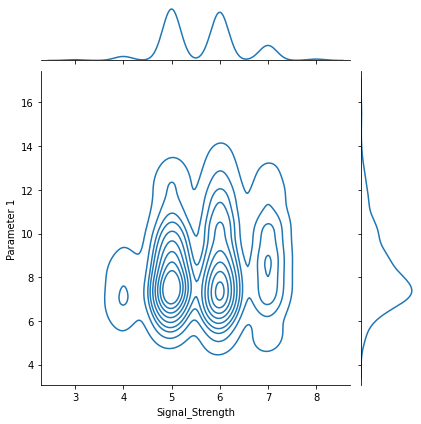

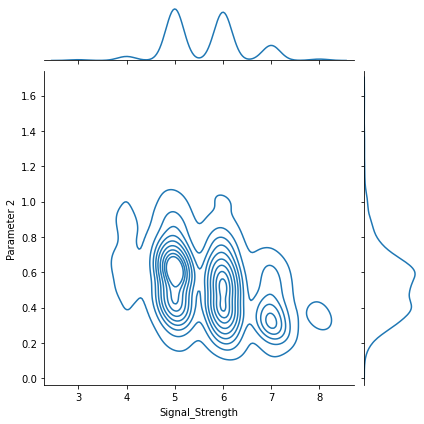

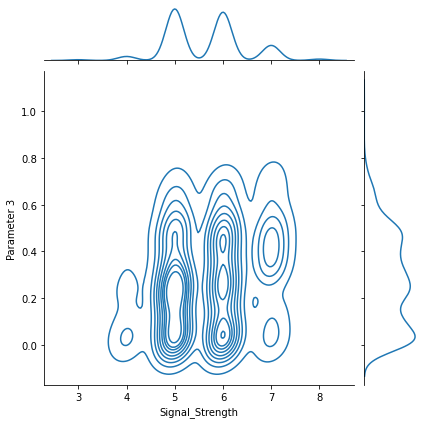

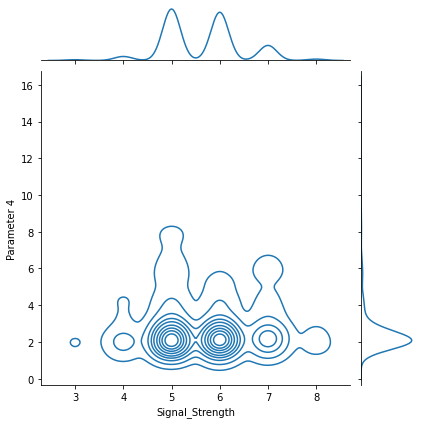

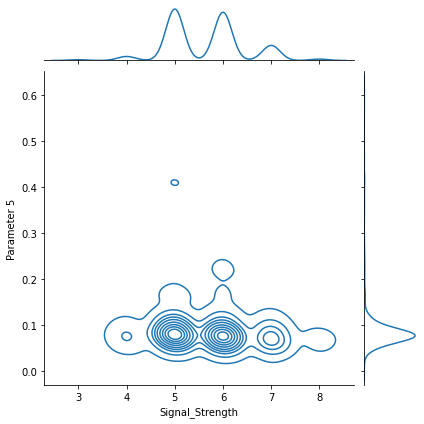

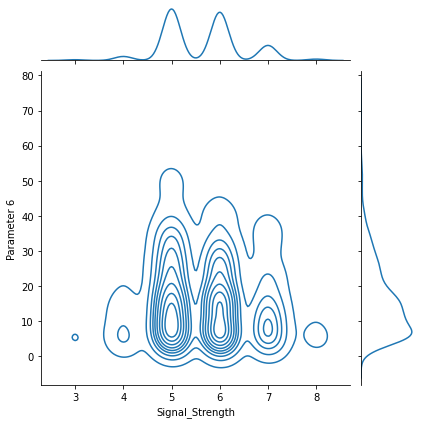

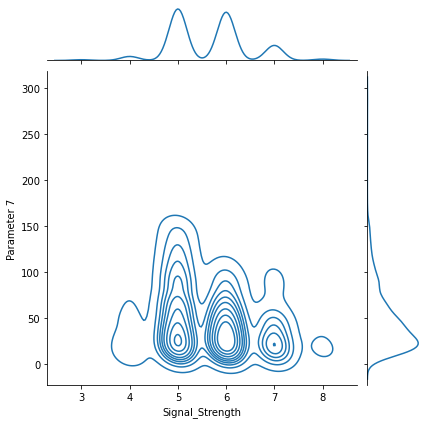

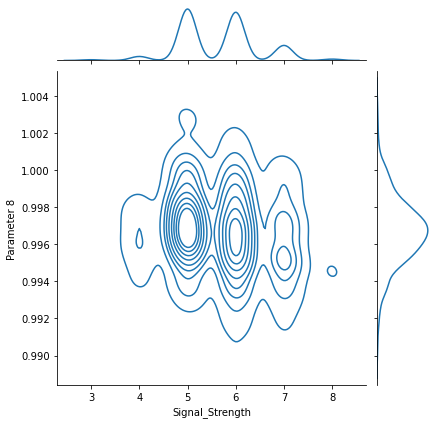

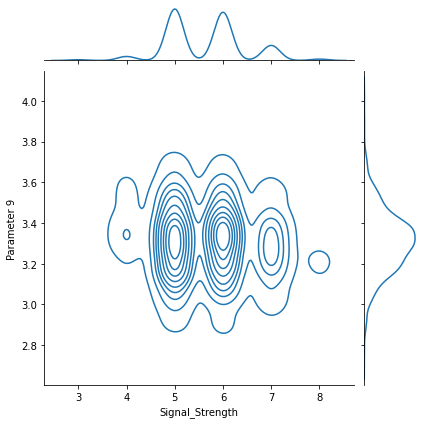

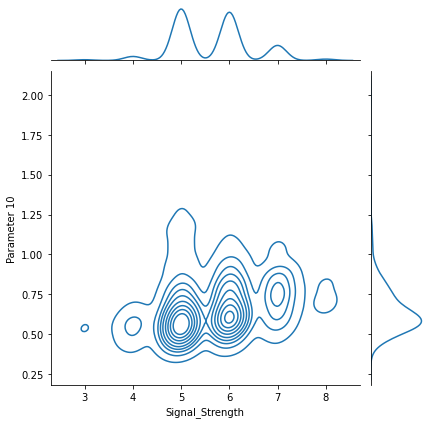

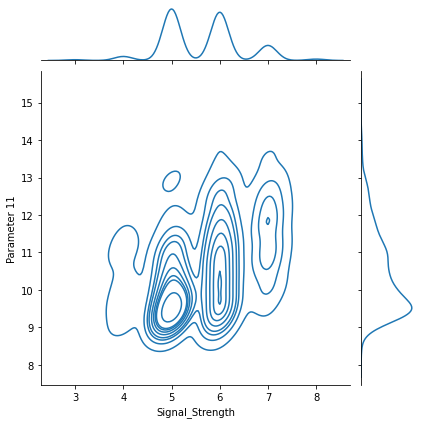

In [18]:
#Getting the target column distributions
vc1=df.drop(['Signal_Strength'],axis=1)
plt.figure(figsize= (5,5))
n=1
for i in vc1:
    vc1[i]=vc1[i].astype(float)
    att = vc1[i]
    sns.jointplot(data=df,x="Signal_Strength", y=i,kind="kde")
    plt.show()

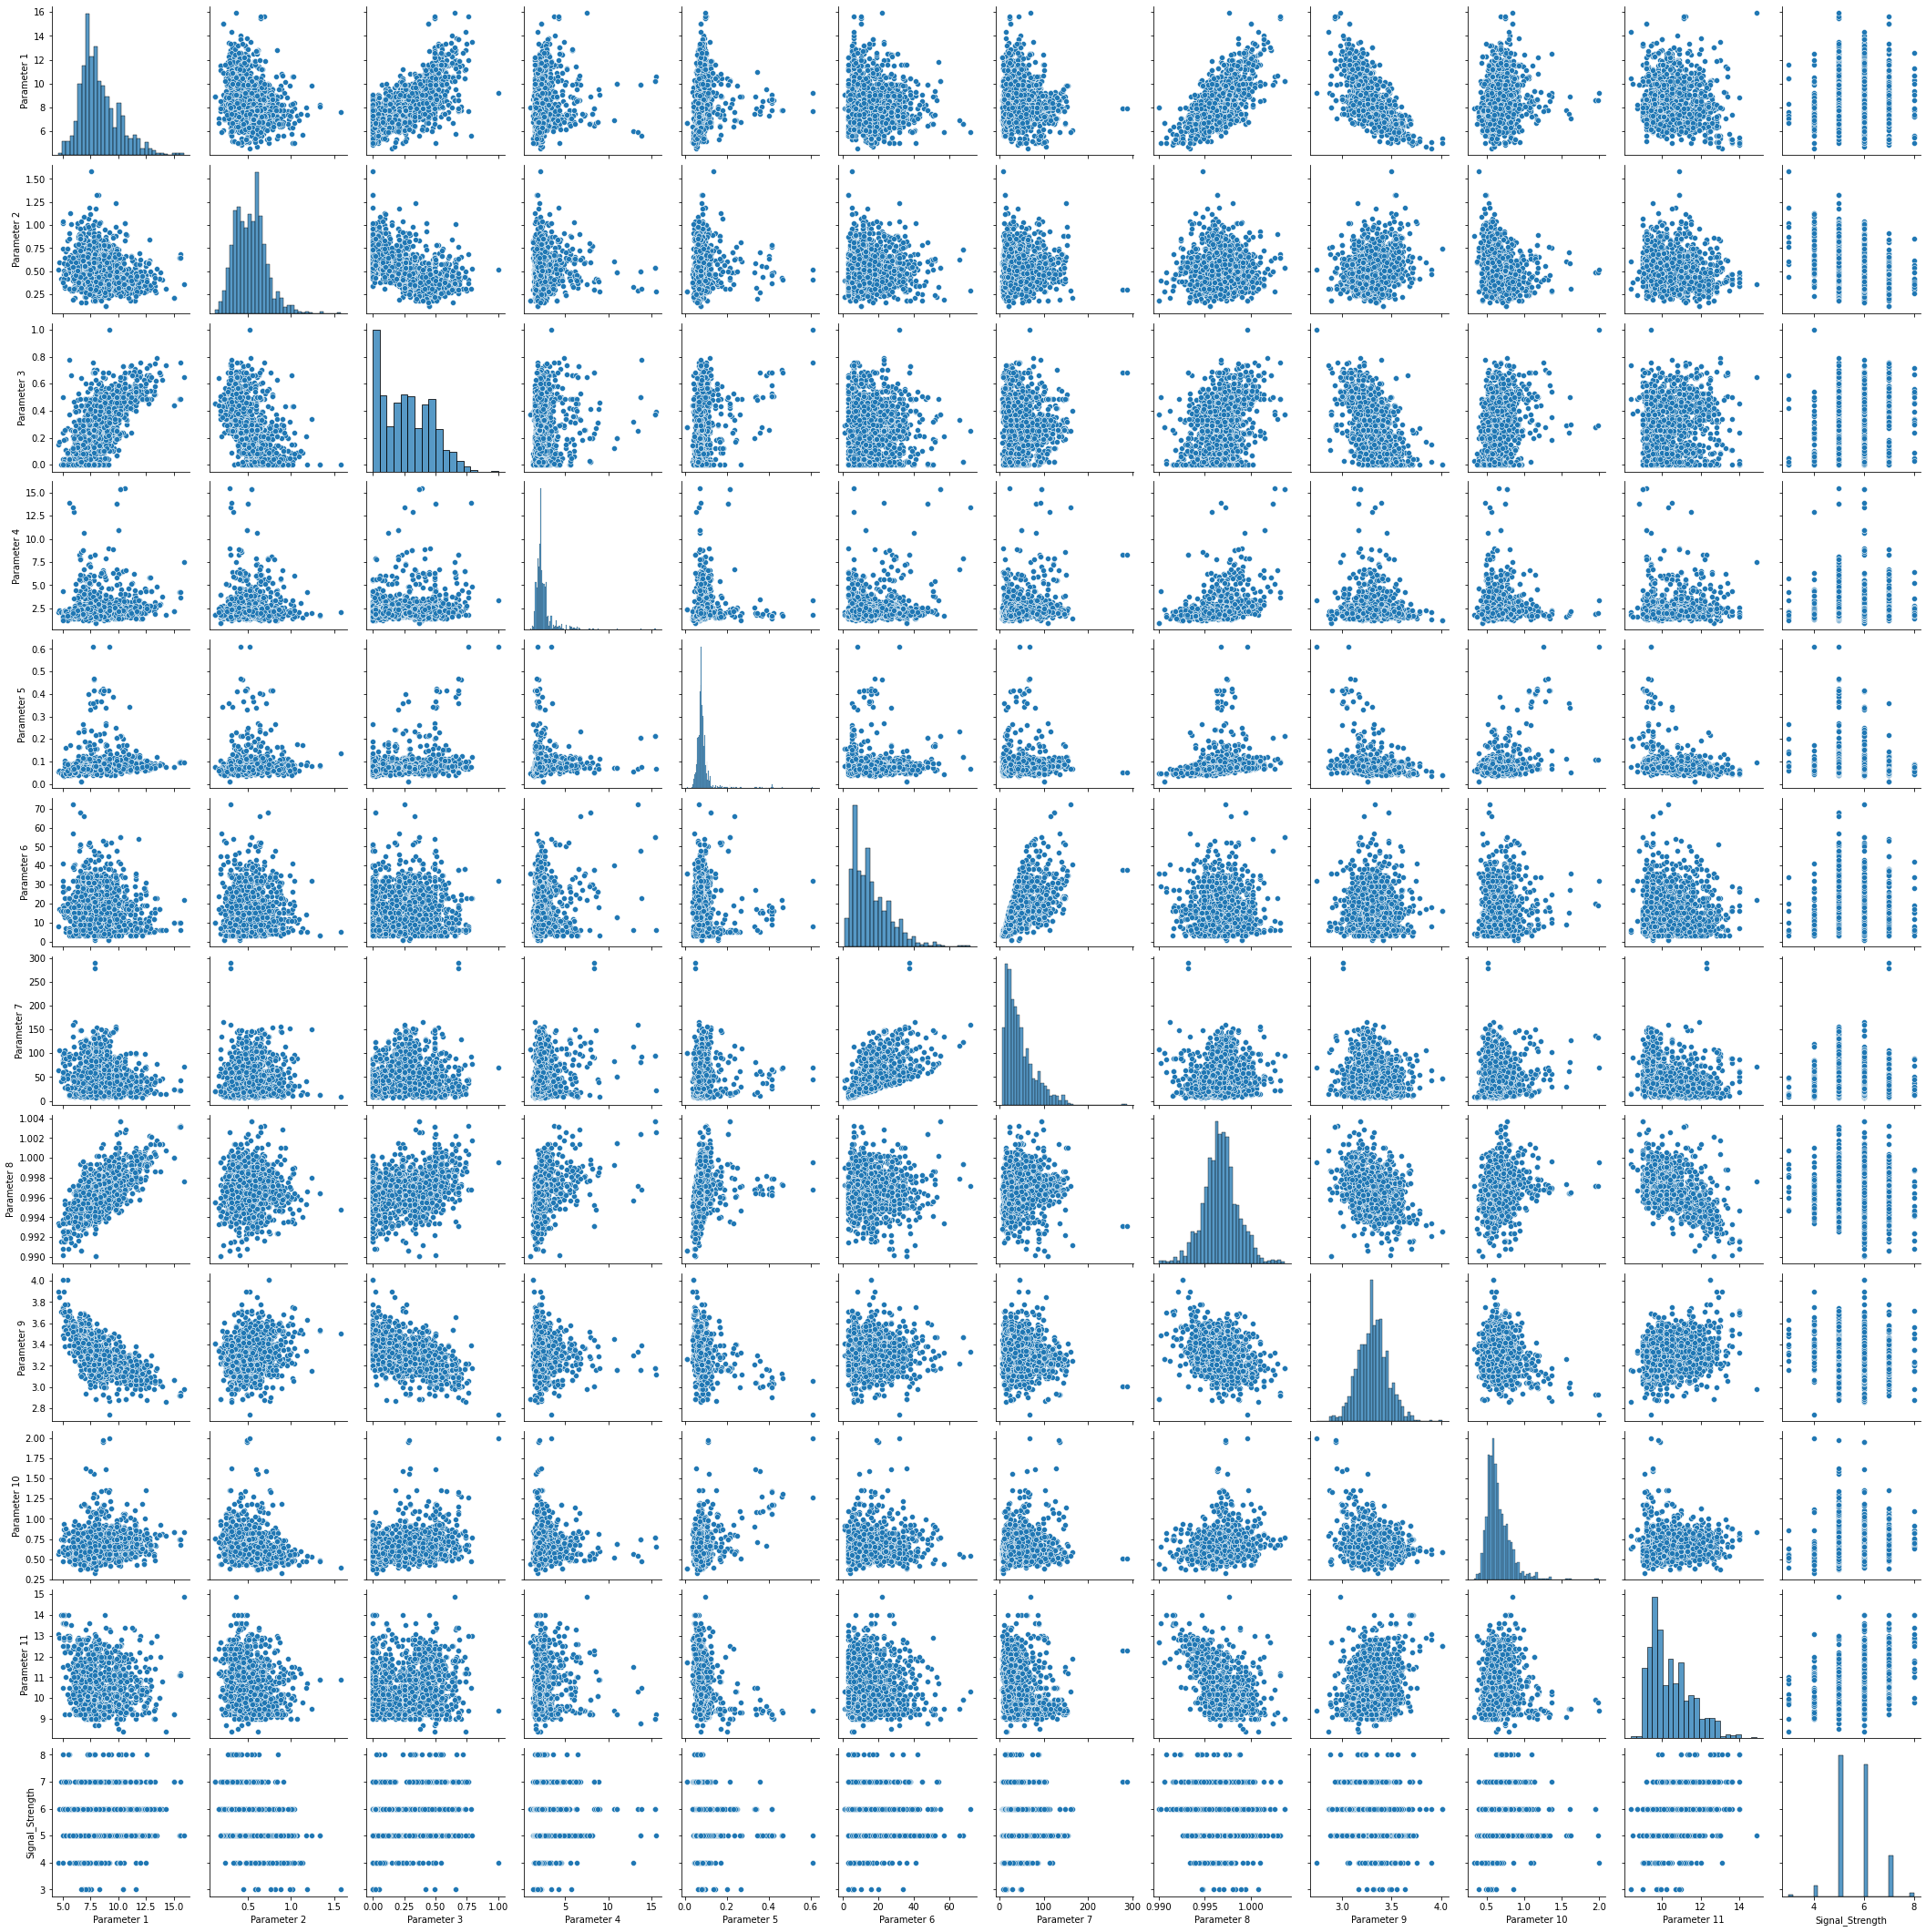

In [19]:
sns.pairplot(df)

In [20]:
print(colored('\x1B[1m Replacing outliers by Median Value','blue'))

n=1
for x in df :
    median=df[x].median()
    att = df[x]
    mean = np.mean(att) 
    std = np.std(att) 
    outlier = [] 
    outliervalue = []
    for i in att: 
        z = (i-mean)/std 
        if z < -3.00 or z > 3.00:
            df[x].replace(i,np.nan, inplace=True)
            df[x].replace(np.nan, median, inplace=True)


 Replacing outliers by Median Value


In [21]:
print(colored('\x1B[1m Checking duplicate rows in dataframe','blue'))
duplicate = df[df.duplicated()] 

print('Duplicate Rows in dataframe are')
duplicate.shape

 Checking duplicate rows in dataframe
Duplicate Rows in dataframe are


(242, 12)

In [22]:
print(colored('\x1B[1m Droping duplicate rows from orignal dataframe','blue'))
df=df.drop_duplicates()

 Droping duplicate rows from orignal dataframe


In [23]:
print(colored('\x1B[1m Checking correlation','blue'))
co = df.corr()
co

 Checking correlation


,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
Parameter 1,1.000000,-0.265369,0.656997,0.176676,0.193620,-0.133272,-0.102142,0.646174,-0.653975,0.201699,-0.057846,0.123509
Parameter 2,-0.265369,1.000000,-0.558679,0.063188,0.106243,0.002591,0.095534,0.016183,0.235277,-0.312001,-0.205257,-0.352318
Parameter 3,0.656997,-0.558679,1.000000,0.154426,0.088543,-0.045450,0.014787,0.358222,-0.545433,0.324154,0.114771,0.228302
Parameter 4,0.176676,0.063188,0.154426,1.000000,0.144377,-0.013266,0.085693,0.332732,-0.060779,0.061869,0.131250,0.039681
Parameter 5,0.193620,0.106243,0.088543,0.144377,1.000000,-0.066003,0.065543,0.320911,-0.180487,0.047617,-0.242817,-0.134126
Parameter 6,-0.133272,0.002591,-0.045450,-0.013266,-0.066003,1.000000,0.631916,-0.019635,0.065255,0.032775,-0.088053,-0.069633
Parameter 7,-0.102142,0.095534,0.014787,0.085693,0.065543,0.631916,1.000000,0.120894,-0.057483,-0.041735,-0.265658,-0.230121
Parameter 8,0.646174,0.016183,0.358222,0.332732,0.320911,-0.019635,0.120894,1.000000,-0.318802,0.138261,-0.483745,-0.169961
Parameter 9,-0.653975,0.235277,-0.545433,-0.060779,-0.180487,0.065255,-0.057483,-0.318802,1.000000,-0.087251,0.164439,-0.053180
Parameter 10,0.201699,-0.312001,0.324154,0.061869,0.047617,0.032775,-0.041735,0.138261,-0.087251,1.000000,0.182529,0.357023


 Checking correlation via heatmap


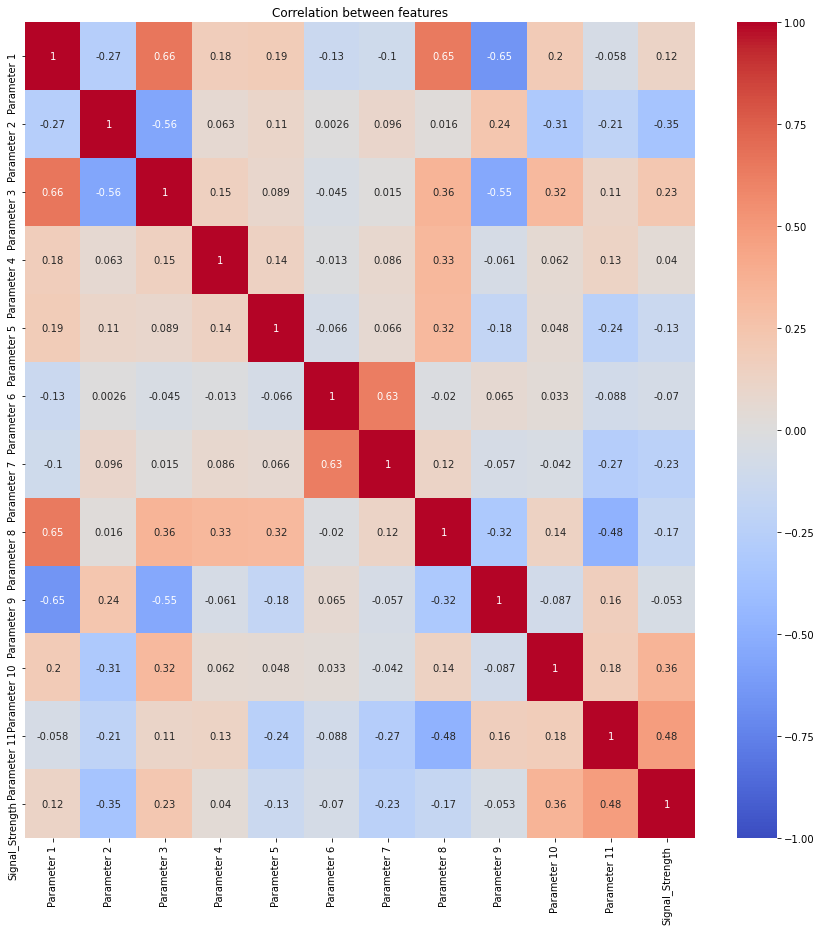

In [24]:
print(colored('\x1B[1m Checking correlation via heatmap','blue'))
plt.figure(figsize=(15,15))
sns.heatmap(co, annot = True, cmap= 'coolwarm', vmax=1.0, vmin=-1.0)
plt.title('Correlation between features')
plt.show()

# REGRESSION MODEL BUILDING

In [25]:
dfc=df.copy(deep=True)

In [26]:
x=dfc.drop(['Signal_Strength'],axis=1)
y=dfc['Signal_Strength']

In [27]:
print(colored('\x1B[1m Spliting the data into train and test sets','blue'))
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=202)

 Spliting the data into train and test sets


In [28]:
print(colored('\x1B[1m Scaling the data','blue'))
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

scaler = StandardScaler().fit(X_test)
X_test = scaler.transform(X_test)

 Scaling the data


In [29]:
print(colored('\x1B[1m Building regressor Model','blue'))
model = Sequential()

model.add(Dense(activation = 'relu', input_dim = 11, units=24, kernel_initializer='uniform'))
model.add(Dense(40,activation='relu'))
model.add(Dense(60,activation='relu'))
model.add(Dropout(.02))
model.add(Dense(45,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dropout(.02))
model.add(Dense(1,activation='linear'))

 Building regressor Model


In [30]:
print(colored('\x1B[1m Compiling Model','blue'))
model.compile(optimizer = 'SGD', loss = ['mse','mae'])

 Compiling Model


In [31]:
print(colored('\x1B[1m Fitting the Model','blue'))
history = model.fit(X_train,Y_train, batch_size=32, epochs=200
                   ,validation_split=0.3)

 Fitting the Model
Epoch 1/200
24/24 [==============================] - 1s 30ms/step - loss: 17.8886 - val_loss: 0.5232
Epoch 2/200
24/24 [==============================] - 0s 3ms/step - loss: 0.8112 - val_loss: 0.4016
Epoch 3/200
24/24 [==============================] - 0s 4ms/step - loss: 0.6532 - val_loss: 0.4020
Epoch 4/200
24/24 [==============================] - 0s 3ms/step - loss: 0.5896 - val_loss: 0.4088
Epoch 5/200
24/24 [==============================] - 0s 4ms/step - loss: 0.6149 - val_loss: 0.4255
Epoch 6/200
24/24 [==============================] - 0s 4ms/step - loss: 0.6260 - val_loss: 0.4013
Epoch 7/200
24/24 [==============================] - 0s 3ms/step - loss: 0.6334 - val_loss: 0.3824
Epoch 8/200
24/24 [==============================] - 0s 3ms/step - loss: 0.6537 - val_loss: 0.3773
Epoch 9/200
24/24 [==============================] - 0s 3ms/step - loss: 0.5284 - val_loss: 0.3948
Epoch 10/200
24/24 [==============================] - 0s 3ms/step - loss: 0.6505 - val_l

In [32]:
print(colored('\x1B[1m Evaluating model with train dataset','blue'))
loss = model.evaluate(X_train, Y_train,verbose=0)
print(colored('\x1B[1mTrain Loss:','red'),loss)


 Evaluating model with train dataset
Train Loss: 0.2788015604019165


In [33]:
print(colored('\x1B[1m Evaluating model with test dataset','blue'))
loss= model.evaluate(X_test, Y_test,verbose=0)
print(colored('\x1B[1mTest Loss:','red'),loss)


 Evaluating model with test dataset
Test Loss: 0.42188888788223267


**Train Loss: 0.278**

**Test Loss: 0.421**

#### Model is overfitted as test loss is twice of train loss, which has to be less than or equal to train loss 


dict_keys(['loss', 'val_loss'])


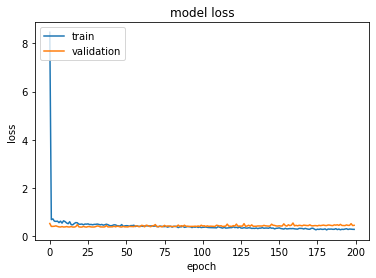

In [34]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### From grapgh it is clear that with increasing epochs the train loss decreases and test loss slightly incecreases

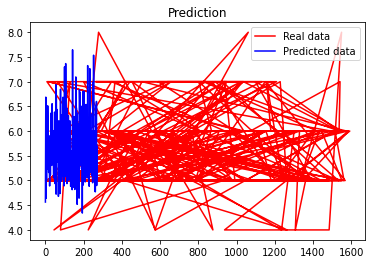

In [35]:
y_pred = model.predict(X_test)

plt.plot(Y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

# HyperTuning

In [36]:
print(colored('\x1B[1m Tuning hperparameters to get best parameters','blue'))
print(colored('\x1B[1m Tuning hperparameters to get best optimizer among\n1. Adam\n2. SGD','blue'))
def Build_Reg(optimizer):
    model = Sequential()
    
    model.add(Dense(activation = 'relu', input_dim = 11, units=24, 
                    kernel_initializer='uniform'))
    model.add(Dense(40,activation='relu'))
    model.add(Dense(60,activation='relu'))
    model.add(Dropout(.02))
    model.add(Dense(45,activation='relu'))
    model.add(Dense(15,activation='relu'))
    model.add(Dropout(.02))
    model.add(Dense(1,activation='linear'))

    model.compile(optimizer = optimizer,loss=['mse'])
    
    return model

 Tuning hperparameters to get best parameters
 Tuning hperparameters to get best optimizer among
1. Adam
2. SGD


In [37]:
print(colored('\x1B[1m Initializing parameters for best optimizer','blue'))
classifier = KerasClassifier(build_fn = Build_Reg)
params1 = {'batch_size': [25, 32],
              'epochs': [100, 200],
              'optimizer': ['adam', 'SGD']}

 Initializing parameters for best optimizer


In [38]:
print(colored('\x1B[1m Finding best optimizer with help of GRID_SEARCH','blue'))
grid_search1 = GridSearchCV(estimator = classifier,
                           param_grid = params1,
                           scoring = 'neg_mean_squared_error',
                           cv = 10)

 Finding best optimizer with help of GRID_SEARCH


In [39]:
grid_search1 = grid_search1.fit(X_train, Y_train,verbose = 0)
best_params1 = grid_search1.best_params_
best_loss1 = grid_search1.best_score_

In [40]:
print(colored('\x1B[1m Best Optimizer is'),list(best_params1.values())[2])
print('Best Parameters after tuning: {}'.format(best_params1))
print('Best loss after tuning: {}'.format(best_loss1))

 Best Optimizer is SGD
Best Parameters after tuning: {'batch_size': 25, 'epochs': 100, 'optimizer': 'SGD'}
Best loss after tuning: -1.0396704043493035


In [41]:
bz=list(best_params1.values())[0]
ep=list(best_params1.values())[1]
op=list(best_params1.values())[2]

In [42]:
print(colored('\x1B[1m Tuning hperparameters to get best Learning_Rate and Momentum','blue'))
def model_LR(learn_rate=0.01, momentum=0):

    model = Sequential()
    model.add(Dense(activation = 'relu', input_dim = 11,units=24,  
                    kernel_initializer='uniform'))
    model.add(Dense(40,activation='relu'))
    model.add(Dense(60,activation='relu'))
    model.add(Dropout(.02))
    model.add(Dense(45,activation='relu'))
    model.add(Dense(15,activation='relu'))
    model.add(Dropout(.02))
    model.add(Dense(1,activation='linear'))
    if op == str('adam'):
        optimizer = tf.keras.optimizers.Adam(learning_rate=learn_rate)
    else:
        optimizer = tf.keras.optimizers.SGD(learning_rate=learn_rate, momentum=momentum)
    model.compile(optimizer = optimizer,loss=['mse'])

    return model

 Tuning hperparameters to get best Learning_Rate and Momentum


In [43]:
model = KerasClassifier(build_fn=model_LR, epochs=ep, batch_size=bz, verbose=0)

In [44]:
print(colored('\x1B[1m Initializing parameters for best Learning_Rate and Momentum','blue'))
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
params2 = dict(learn_rate=learn_rate, momentum=momentum)

 Initializing parameters for best Learning_Rate and Momentum


In [45]:
print(colored('\x1B[1m Finding best Learning_Rate with help of RANDOM_SEARCH','blue'))
grid2 = RandomizedSearchCV(estimator = model,
                          param_distributions = params2,cv = 10,
                          scoring = 'neg_mean_squared_error')

 Finding best Learning_Rate with help of RANDOM_SEARCH


In [46]:
grid_search2 = grid2.fit(X_train, Y_train,verbose = 0)

In [47]:
best_params2 = grid_search2.best_params_
best_loss2 = grid_search2.best_score_

In [48]:
print(colored('\x1B[1m Best Momentum is'),list(best_params2.values())[0])
print(colored('\x1B[1m Best Learning_Rate is'),list(best_params2.values())[1])
print('Best loss after tuning: {}'.format(best_loss2))

 Best Momentum is 0.9
 Best Learning_Rate is 0.001
Best loss after tuning: -1.0396704043493035


In [49]:
m=list(best_params2.values())[0]
lr=list(best_params2.values())[1]

if op == str('adam'):
    opt = tf.keras.optimizers.Adam(learning_rate=lr)
else:
    opt = tf.keras.optimizers.SGD(learning_rate=lr, momentum=m)    

In [50]:
print(colored('\x1B[1m Tuning hperparameters to get best No. of Neurons','blue'))

def Model_N(neurons=1):
    
    model = Sequential()
    model.add(Dense(activation = 'relu', input_dim = 11, units=neurons, 
                    kernel_initializer='uniform'))
    model.add(Dense(neurons,activation='relu'))
    model.add(Dense(neurons,activation='relu'))
    model.add(Dropout(.02))
    model.add(Dense(neurons,activation='relu'))
    model.add(Dense(neurons,activation='relu'))
    model.add(Dropout(.02))
    model.add(Dense(1,activation='linear'))

    model.compile(optimizer = opt,loss=['mse'])

    return model

 Tuning hperparameters to get best No. of Neurons


In [51]:
model = KerasClassifier(build_fn = Model_N, epochs=ep, batch_size=bz, verbose=0)

In [52]:
print(colored('\x1B[1m Initializing parameters for best No. of Neurons','blue'))
neurons = [ 5, 10, 15, 20, 25, 30]
params3 = dict(neurons=neurons)

 Initializing parameters for best No. of Neurons


In [53]:
print(colored('\x1B[1m Finding best No. of Neurons with help of RANDOM_SEARCH','blue'))
grid3 = RandomizedSearchCV(estimator = model,
                          param_distributions = params3,cv = 10,
                          scoring = 'neg_mean_squared_error')

 Finding best No. of Neurons with help of RANDOM_SEARCH


In [54]:
grid_search3 = grid3.fit(X_train, Y_train,verbose = 0)

In [55]:
best_params3 = grid_search3.best_params_
best_loss3 = grid_search3.best_score_

In [56]:
print(colored('\x1B[1m Best No. of Neurons is'),list(best_params3.values())[0])
print('Best loss after tuning: {}'.format(best_loss3))

 Best No. of Neurons is 30
Best loss after tuning: -1.0387529731566427


In [57]:
neurons=list(best_params3.values())[0]

In [58]:
print(colored('\x1B[1m Tuning hperparameters to get best No. of Dropout_Rate','blue'))

def Model_D(dropout_rate):

    model = Sequential()
    model.add(Dense(neurons, activation='relu',input_dim = 11,
                         kernel_initializer='uniform'))
    model.add(Dense(neurons, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))


    model.compile(optimizer = opt,loss=['mse'])
    
    return model

 Tuning hperparameters to get best No. of Dropout_Rate


In [59]:
model = KerasClassifier(build_fn=Model_D, epochs=ep, batch_size=bz, verbose=0)

In [60]:
print(colored('\x1B[1m Initializing parameters for best No. of Dropout_Rate','blue'))
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
params4 = dict(dropout_rate=dropout_rate)

 Initializing parameters for best No. of Dropout_Rate


In [61]:
print(colored('\x1B[1m Finding best No. of Dropout_Rate with help of RANDOM_SEARCH','blue'))
grid4 = RandomizedSearchCV(estimator = model,
                          param_distributions = params4,cv = 10,
                          scoring = 'neg_mean_squared_error')

 Finding best No. of Dropout_Rate with help of RANDOM_SEARCH


In [62]:
grid_search4 = grid4.fit(X_train, Y_train,verbose = 0)

In [63]:
best_params4 = grid_search4.best_params_
best_loss4 = grid_search4.best_score_

In [64]:
print(colored('\x1B[1m Best No. of Dropout_Rate is'),list(best_params4.values())[0])
print('Best Parameters after tuning: {}'.format(best_params4))
print('Best loss after tuning: {}'.format(best_loss4))

 Best No. of Dropout_Rate is 0.0
Best Parameters after tuning: {'dropout_rate': 0.0}
Best loss after tuning: -1.0396704043493035


In [65]:
dropout_rate=list(best_params4.values())[0]

#### After getting all best parameters, building the model with all best parameters

In [66]:
print(colored('\x1B[1m Rebuilding Model with all best Parameters','blue'))
model = Sequential()
model.add(Dense(neurons, activation='relu',input_dim = 11,
                         kernel_initializer='uniform'))
model.add(Dense(neurons, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(dropout_rate))
model.add(Dense(neurons, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(dropout_rate))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))

 Rebuilding Model with all best Parameters


In [67]:
print(colored('\x1B[1m Compiling Model','blue'))
model.compile(optimizer = opt ,loss=['mse'])

 Compiling Model


In [68]:
print(colored('\x1B[1m Fitting the Model','blue'))
history = model.fit(X_train, Y_train, epochs=ep,batch_size=bz, validation_split=0.3)

 Fitting the Model
Epoch 1/100
31/31 [==============================] - 1s 10ms/step - loss: 27.9029 - val_loss: 12.1246
Epoch 2/100
31/31 [==============================] - 0s 4ms/step - loss: 8.9078 - val_loss: 2.0862
Epoch 3/100
31/31 [==============================] - 0s 5ms/step - loss: 1.4406 - val_loss: 0.6181
Epoch 4/100
31/31 [==============================] - 0s 4ms/step - loss: 0.6499 - val_loss: 0.6205
Epoch 5/100
31/31 [==============================] - 0s 4ms/step - loss: 0.6237 - val_loss: 0.6165
Epoch 6/100
31/31 [==============================] - 0s 4ms/step - loss: 0.6110 - val_loss: 0.6165
Epoch 7/100
31/31 [==============================] - 0s 3ms/step - loss: 0.6663 - val_loss: 0.6159
Epoch 8/100
31/31 [==============================] - 0s 4ms/step - loss: 0.6503 - val_loss: 0.6157
Epoch 9/100
31/31 [==============================] - 0s 5ms/step - loss: 0.6449 - val_loss: 0.6151
Epoch 10/100
31/31 [==============================] - 0s 3ms/step - loss: 0.6156 - val_

In [69]:
print(colored('\x1B[1m Evaluating model with train dataset','blue'))
loss= model.evaluate(X_train, Y_train,verbose=0)
print(colored('\x1B[1mTrain Loss:','red'),(loss))

 Evaluating model with train dataset
Train Loss: 0.3643158972263336


In [70]:
print(colored('\x1B[1m Evaluating model with test dataset','blue'))
loss= model.evaluate(X_test, Y_test,verbose=0)
print(colored('\x1B[1mTest Loss:','red'),(loss))

 Evaluating model with test dataset
Test Loss: 0.37055355310440063


#### Train Loss: 0.364
#### Test Loss: 0.3705
#### Model is trained moderately as test loss and train loss is almost equal
#### But the losses should be as minimum as possible

### Tuning parameters manually with using ramdom values to get minimum loss

In [71]:
lr = 2e-2
Lambda = 1e-4
d=1e-6
m=0.9

In [72]:
print(colored('\x1B[1m Building the Model','blue'))
rg_model = Sequential()

rg_model.add(Dense(activation = 'relu', input_dim = 11, units=24, kernel_initializer='uniform'))
rg_model.add(Dense(40,activation='relu'))
rg_model.add(Dense(60,activation='relu'))
rg_model.add(Dropout(.02))
rg_model.add(Dense(45,activation='relu'))
rg_model.add(Dense(15,activation='relu'))
rg_model.add(Dropout(.02))
rg_model.add(Dense(1,activation='linear',kernel_regularizer=regularizers.l2(Lambda)))

 Building the Model


In [73]:
if op == str('adam'):
    opt = tf.keras.optimizers.Adam(learning_rate=lr,decay=d)
else:
    opt = tf.keras.optimizers.SGD(learning_rate=lr, momentum=m, decay=d)    

In [74]:
print(colored('\x1B[1m Compiling Model','blue'))
rg_model.compile(optimizer = opt ,loss=['mae'])

 Compiling Model


In [75]:
print(colored('\x1B[1m Fitting the Model','blue'))

 Fitting the Model


In [76]:
history = rg_model.fit(X_train, Y_train, epochs=ep,batch_size=bz, validation_split=0.3)

Epoch 1/100
31/31 [==============================] - 2s 17ms/step - loss: 3.9730 - val_loss: 0.6715
Epoch 2/100
31/31 [==============================] - 0s 4ms/step - loss: 0.6606 - val_loss: 0.6488
Epoch 3/100
31/31 [==============================] - 0s 5ms/step - loss: 0.6251 - val_loss: 0.5589
Epoch 4/100
31/31 [==============================] - 0s 5ms/step - loss: 0.5487 - val_loss: 0.5704
Epoch 5/100
31/31 [==============================] - 0s 6ms/step - loss: 0.6207 - val_loss: 0.5901
Epoch 6/100
31/31 [==============================] - 0s 5ms/step - loss: 0.5589 - val_loss: 0.4659
Epoch 7/100
31/31 [==============================] - 0s 6ms/step - loss: 0.5232 - val_loss: 0.5360
Epoch 8/100
31/31 [==============================] - 0s 5ms/step - loss: 0.5194 - val_loss: 0.4594
Epoch 9/100
31/31 [==============================] - 0s 6ms/step - loss: 0.4836 - val_loss: 0.5631
Epoch 10/100
31/31 [==============================] - 0s 7ms/step - loss: 0.5175 - val_loss: 0.4679
Epoch 11

In [77]:
print(colored('\x1B[1m Evaluating model with train dataset','blue'))
rg_model.fit(X_train, Y_train, epochs=ep, batch_size=bz, verbose= 0)
loss1= rg_model.evaluate(X_train, Y_train, verbose=0)

 Evaluating model with train dataset


In [78]:
print(colored('\x1B[1mTrain Loss:','red'),(loss1))

Train Loss: 0.24150460958480835


In [79]:
print(colored('\x1B[1m Evaluating model with test dataset','blue'))

 Evaluating model with test dataset


In [80]:
rg_model.fit(X_test, Y_test, epochs=ep, batch_size=bz, verbose= 1)
loss= rg_model.evaluate(X_test, Y_test, verbose=0)

Epoch 1/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4836
Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4258
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4220
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 0.3923
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 0.3705
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 0.3674
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 0.3568
Epoch 8/100
11/11 [==============================] - 0s 8ms/step - loss: 0.3481
Epoch 9/100
11/11 [==============================] - 0s 2ms/step - loss: 0.3297
Epoch 10/100
11/11 [==============================] - 0s 2ms/step - loss: 0.3229
Epoch 11/100
11/11 [==============================] - 0s 2ms/step - loss: 0.3063
Epoch 12/100
11/11 [==============================] - 0s 3ms/step - loss: 0.3056
Epoch 13/100
11/11 [=================

In [81]:
print(colored('\x1B[1mTest Loss:','red'),(loss))

Test Loss: 0.2353844940662384


#### Train Loss: 0.2415
#### Test Loss: 0.2353
#### Model is trained almost very precisely, as both losses are very less and even test loss is less than train loss

## Pickeling the best model

In [82]:
print(colored('\x1B[1mSaving Model:','blue'))
rg_model.save('NN Regressor')

Saving Model:
INFO:tensorflow:Assets written to: NN Regressor/assets


# #2. Classification MODEL BUILDING

In [83]:
dfc=df.copy(deep=True)

In [84]:
x=dfc.drop(['Signal_Strength'],axis=1)
y=dfc['Signal_Strength']

In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state= 202)

In [86]:
print(colored('\x1B[1m Scaling the data','blue'))
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

scaler = StandardScaler().fit(X_test)
X_test = scaler.transform(X_test)

 Scaling the data


In [87]:
print(colored('\x1B[1m Converting target column to vector by one-hot encoding','blue'))
from keras.utils import np_utils
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

 Converting target column to vector by one-hot encoding


In [88]:
print(colored('\x1B[1m Building classifier model','blue'))
model = Sequential()
model.add(keras.layers.Flatten(input_shape=(11,)))
model.add(Dense(50))
model.add(BatchNormalization())
model.add(Dropout(.02))
model.add(Activation('relu'))    
model.add(Dense(50))
model.add(BatchNormalization())                    
model.add(Dropout(.02))
model.add(Activation('relu'))    
model.add(Dense(50))
model.add(BatchNormalization())                    
model.add(Dropout(.02))
model.add(Activation('relu'))    
model.add(Dense(50))
model.add(BatchNormalization())                    
model.add(Dropout(.02))
model.add(Activation('relu'))    
model.add(Dense(9))
model.add(Activation('softmax'))

 Building classifier model


In [89]:
print(colored('\x1B[1m Compiling Model','blue'))
model.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])

 Compiling Model


In [90]:
print(colored('\x1B[1m Fitting the Model','blue'))

 Fitting the Model


In [91]:
model.fit(X_train,Y_train, batch_size=32, epochs=200, 
          validation_data=(X_test, Y_test))

Epoch 1/200
34/34 [==============================] - 2s 12ms/step - loss: 2.1347 - accuracy: 0.1731 - val_loss: 1.9835 - val_accuracy: 0.4559
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 1.6158 - accuracy: 0.4045 - val_loss: 1.7971 - val_accuracy: 0.4853
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 1.3589 - accuracy: 0.4904 - val_loss: 1.6092 - val_accuracy: 0.5331
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 1.2023 - accuracy: 0.5715 - val_loss: 1.4506 - val_accuracy: 0.5515
Epoch 5/200
34/34 [==============================] - 0s 5ms/step - loss: 1.1220 - accuracy: 0.5802 - val_loss: 1.3254 - val_accuracy: 0.5551
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 1.0758 - accuracy: 0.5786 - val_loss: 1.2354 - val_accuracy: 0.5809
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 0.9988 - accuracy: 0.6116 - val_loss: 1.1711 - val_accuracy: 0.5772
Epoch 8/200


In [92]:
print(colored('\x1B[1m Evaluating model with train dataset','blue'))
loss,accu=model.evaluate(X_train, Y_train)
print(colored('\x1B[1mtTrain Loss:','red'),(loss))
print(colored('\x1B[1mTrain Accuracy:','green'),(accu))

 Evaluating model with train dataset
34/34 [==============================] - 0s 3ms/step - loss: 0.2963 - accuracy: 0.9217
Test Loss: 0.2963239550590515
Test Accuracy: 0.921658992767334


In [93]:
print(colored('\x1B[1m Evaluating model with test dataset','blue'))
loss,accu=model.evaluate(X_test, Y_test)
print(colored('\x1B[1mTest Loss:','red'),(loss))
print(colored('\x1B[1mTest Accuracy:','green'),(accu))

 Evaluating model with test dataset
9/9 [==============================] - 0s 2ms/step - loss: 1.3015 - accuracy: 0.5772
Test Loss: 1.301488995552063
Test Accuracy: 0.5772058963775635


#### Train loss: 0.2963
#### Test loss: 1.30
#### Train accuracy: 0.921
#### Test accuracy: 0.577
#### Model is not trained properly as test accuracy is very less than train accuracy and even test loss is very large than train loss

In [94]:
print(colored('\x1B[1m Tuning hperparameters to get best parameters','blue'))
def model_builder(hp):
    model = keras.Sequential()
    
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4,2e-2,2e-4,2e-4])
    d = hp.Choice('decay', values=[1e-4, 1e-6, 1e-8])
    m = hp.Choice('momentum', values=[.7,.9,.5])
    Lambda = hp.Choice('Lambda', values=[1e-2, 1e-4, 1e-6])
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    
    model.add(keras.layers.Flatten(input_shape=(11,)))
   
    model.add(keras.layers.Dense(units=hp_units, activation='relu'))

    model.add(Activation('relu'))
    model.add(Dense(40,activation='relu'))
    model.add(Dense(60,activation='relu'))
    model.add(Dropout(.02))
    model.add(Dense(45,activation='relu'))
    model.add(Dense(15,activation='relu'))
    model.add(Dropout(.02))
    model.add(Dense(9, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    model.compile(optimizer=keras.optimizers.SGD(learning_rate=lr, momentum=m, decay=d),
                loss='categorical_crossentropy',metrics=['accuracy'])
    
    return model

 Tuning hperparameters to get best parameters


In [95]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

INFO:tensorflow:Reloading Oracle from existing project my_dir/intro_to_kt/oracle.json
INFO:tensorflow:Reloading Tuner from my_dir/intro_to_kt/tuner0.json


In [96]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

In [97]:
tuner.search(X_train, Y_train, epochs=100, validation_split=0.3, callbacks=[stop_early])
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

INFO:tensorflow:Oracle triggered exit


In [98]:
print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")


The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 256 and the optimal learning rate for the optimizer
is 0.01.



In [99]:
print(colored('\x1B[1m Rebuilding and Refitting the Model with best parameters','blue'))
model = tuner.hypermodel.build(best_hps)

 Rebuilding and Refitting the Model with best parameters


In [100]:
history = model.fit(X_train, Y_train, epochs=50, validation_split=0.3)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/50
24/24 [==============================] - 1s 20ms/step - loss: 2.1867 - accuracy: 0.2418 - val_loss: 1.7407 - val_accuracy: 0.3712
Epoch 2/50
24/24 [==============================] - 0s 6ms/step - loss: 1.5833 - accuracy: 0.4269 - val_loss: 1.2772 - val_accuracy: 0.5767
Epoch 3/50
24/24 [==============================] - 0s 7ms/step - loss: 1.2504 - accuracy: 0.5619 - val_loss: 1.1897 - val_accuracy: 0.5706
Epoch 4/50
24/24 [==============================] - 0s 8ms/step - loss: 1.1503 - accuracy: 0.6065 - val_loss: 1.1498 - val_accuracy: 0.5583
Epoch 5/50
24/24 [==============================] - 0s 9ms/step - loss: 1.1096 - accuracy: 0.6153 - val_loss: 1.0900 - val_accuracy: 0.5706
Epoch 6/50
24/24 [==============================] - 0s 4ms/step - loss: 1.1181 - accuracy: 0.5824 - val_loss: 1.0469 - val_accuracy: 0.5644
Epoch 7/50
24/24 [==============================] - 0s 4ms/step - loss: 1.1032 - accuracy: 0.5580 - val_loss: 1.0234 - val_accuracy: 0.5736
Epoch 8/50
24/24 [=

In [101]:
print(colored('\x1B[1m Rebuilding and Refitting the Model with best epochs','blue'))
hypermodel = tuner.hypermodel.build(best_hps)

 Rebuilding and Refitting the Model with best epochs


In [102]:
hypermodel.fit(X_train, Y_train, epochs=best_epoch, validation_split=0.3)

Epoch 1/33
24/24 [==============================] - 1s 11ms/step - loss: 2.0598 - accuracy: 0.3983 - val_loss: 1.4583 - val_accuracy: 0.4448
Epoch 2/33
24/24 [==============================] - 0s 5ms/step - loss: 1.3978 - accuracy: 0.4554 - val_loss: 1.2595 - val_accuracy: 0.5460
Epoch 3/33
24/24 [==============================] - 0s 4ms/step - loss: 1.2942 - accuracy: 0.5489 - val_loss: 1.1982 - val_accuracy: 0.5767
Epoch 4/33
24/24 [==============================] - 0s 3ms/step - loss: 1.2165 - accuracy: 0.5792 - val_loss: 1.1697 - val_accuracy: 0.5798
Epoch 5/33
24/24 [==============================] - 0s 4ms/step - loss: 1.1703 - accuracy: 0.5808 - val_loss: 1.1361 - val_accuracy: 0.5767
Epoch 6/33
24/24 [==============================] - 0s 5ms/step - loss: 1.2002 - accuracy: 0.5384 - val_loss: 1.1574 - val_accuracy: 0.5399
Epoch 7/33
24/24 [==============================] - 0s 4ms/step - loss: 1.1209 - accuracy: 0.5683 - val_loss: 1.0994 - val_accuracy: 0.5828
Epoch 8/33
24/24 [=

In [103]:
print(colored('\x1B[1m Evaluating model with train dataset','blue'))

 Evaluating model with train dataset


In [104]:
loss,accu = hypermodel.evaluate(X_train, Y_train)
print(colored('\x1B[1mTrain Loss:','red'),(loss))
print(colored('\x1B[1mTrain Accuracy:','green'),(accu))

34/34 [==============================] - 0s 1ms/step - loss: 0.8563 - accuracy: 0.6728
Test Loss: 0.8563024997711182
Test Accuracy: 0.6728110313415527


In [105]:
print(colored('\x1B[1m Evaluating model with test dataset','blue'))

 Evaluating model with test dataset


In [106]:
loss,accu = hypermodel.evaluate(X_test, Y_test)
print(colored('\x1B[1mTest Loss:','red'),(loss))
print(colored('\x1B[1mTest Accuracy:','green'),(accu))

9/9 [==============================] - 0s 2ms/step - loss: 1.0886 - accuracy: 0.6029
Test Loss: 1.0886085033416748
Test Accuracy: 0.6029411554336548


#### Train Loss: 0.856
#### Test loss: 1.0886
#### Train Accuracy: 0.6728
#### Test accuracy: 0.6029
#### Model is not trained properly as test accuracy is  less than train accuracy and even test loss is very large than train loss

### Tuning parameters manually with using ramdom values to get minimum loss and high accuracy

In [107]:
lr = 2e-2
Lambda = 1e-4
d=1e-6
m=0.9

In [108]:
print(colored('\x1B[1m Building the Model','blue'))
cl_model = Sequential()
cl_model.add(keras.layers.Flatten(input_shape=(11,)))
cl_model.add(Dense(50))
cl_model.add(BatchNormalization())
cl_model.add(Dropout(.02))
cl_model.add(Activation('relu'))    
cl_model.add(Dense(50))
cl_model.add(BatchNormalization())                    
cl_model.add(Dropout(.02))
cl_model.add(Activation('relu'))    
cl_model.add(Dense(50))
cl_model.add(BatchNormalization())                    
cl_model.add(Dropout(.02))
cl_model.add(Activation('relu'))    
cl_model.add(Dense(50))
cl_model.add(BatchNormalization())                    
cl_model.add(Dropout(.02))
cl_model.add(Activation('relu'))    
cl_model.add(Dense(9, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))

 Building the Model


In [109]:
opt = tf.keras.optimizers.SGD(learning_rate=lr, momentum=m, decay=d)    

In [110]:
print(colored('\x1B[1m Compiling Model','blue'))
cl_model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

 Compiling Model


In [111]:
print(colored('\x1B[1m Fitting the Model','blue'))

 Fitting the Model


In [112]:
history = cl_model.fit(X_train, Y_train, epochs=best_epoch,batch_size=bz, validation_split=0.3)

Epoch 1/33
31/31 [==============================] - 2s 13ms/step - loss: 2.0691 - accuracy: 0.2748 - val_loss: 1.3199 - val_accuracy: 0.5460
Epoch 2/33
31/31 [==============================] - 0s 4ms/step - loss: 1.0606 - accuracy: 0.5293 - val_loss: 1.1835 - val_accuracy: 0.5798
Epoch 3/33
31/31 [==============================] - 0s 4ms/step - loss: 0.9674 - accuracy: 0.5789 - val_loss: 1.0640 - val_accuracy: 0.6227
Epoch 4/33
31/31 [==============================] - 0s 4ms/step - loss: 0.9373 - accuracy: 0.5696 - val_loss: 1.0060 - val_accuracy: 0.6104
Epoch 5/33
31/31 [==============================] - 0s 5ms/step - loss: 0.9038 - accuracy: 0.5980 - val_loss: 0.9823 - val_accuracy: 0.5951
Epoch 6/33
31/31 [==============================] - 0s 4ms/step - loss: 0.9226 - accuracy: 0.5806 - val_loss: 0.9642 - val_accuracy: 0.5798
Epoch 7/33
31/31 [==============================] - 0s 4ms/step - loss: 0.8949 - accuracy: 0.5848 - val_loss: 1.0057 - val_accuracy: 0.5706
Epoch 8/33
31/31 [=

In [113]:
print(colored('\x1B[1m Evaluating model with train dataset','blue'))

 Evaluating model with train dataset


In [114]:
cl_model.fit(X_train, Y_train, epochs=best_epoch, batch_size=bz, verbose= 1)
loss1,accu1 = cl_model.evaluate(X_train, Y_train, verbose=0)

Epoch 1/33
44/44 [==============================] - 0s 3ms/step - loss: 0.8416 - accuracy: 0.6332
Epoch 2/33
44/44 [==============================] - 0s 2ms/step - loss: 0.7853 - accuracy: 0.6581
Epoch 3/33
44/44 [==============================] - 0s 2ms/step - loss: 0.8111 - accuracy: 0.6516
Epoch 4/33
44/44 [==============================] - 0s 3ms/step - loss: 0.7439 - accuracy: 0.6820
Epoch 5/33
44/44 [==============================] - 0s 2ms/step - loss: 0.7351 - accuracy: 0.6820
Epoch 6/33
44/44 [==============================] - 0s 2ms/step - loss: 0.7393 - accuracy: 0.6673
Epoch 7/33
44/44 [==============================] - 0s 2ms/step - loss: 0.7247 - accuracy: 0.6894
Epoch 8/33
44/44 [==============================] - 0s 2ms/step - loss: 0.7212 - accuracy: 0.6774
Epoch 9/33
44/44 [==============================] - 0s 2ms/step - loss: 0.7168 - accuracy: 0.6885
Epoch 10/33
44/44 [==============================] - 0s 2ms/step - loss: 0.7173 - accuracy: 0.6848
Epoch 11/33
44/44 [

In [115]:
print(colored('\x1B[1mTrain Loss:','red'),(loss1))
print(colored('\x1B[1mTrain Accuracy:','green'),(accu1))

Train Loss: 0.41428008675575256
Train Accuracy: 0.8442396521568298


In [116]:
print(colored('\x1B[1m Evaluating model with test dataset','blue'))

 Evaluating model with test dataset


In [117]:
cl_model.fit(X_test, Y_test, epochs=best_epoch, batch_size=bz, verbose= 1)
loss,accu = cl_model.evaluate(X_test, Y_test, verbose=0)

Epoch 1/33
11/11 [==============================] - 0s 2ms/step - loss: 1.2797 - accuracy: 0.5772
Epoch 2/33
11/11 [==============================] - 0s 2ms/step - loss: 0.9841 - accuracy: 0.6507
Epoch 3/33
11/11 [==============================] - 0s 2ms/step - loss: 0.8416 - accuracy: 0.6765
Epoch 4/33
11/11 [==============================] - 0s 2ms/step - loss: 0.7928 - accuracy: 0.6507
Epoch 5/33
11/11 [==============================] - 0s 3ms/step - loss: 0.7388 - accuracy: 0.6838
Epoch 6/33
11/11 [==============================] - 0s 2ms/step - loss: 0.6791 - accuracy: 0.6875
Epoch 7/33
11/11 [==============================] - 0s 2ms/step - loss: 0.6110 - accuracy: 0.7353
Epoch 8/33
11/11 [==============================] - 0s 2ms/step - loss: 0.6281 - accuracy: 0.7353
Epoch 9/33
11/11 [==============================] - 0s 2ms/step - loss: 0.5747 - accuracy: 0.7757
Epoch 10/33
11/11 [==============================] - 0s 3ms/step - loss: 0.5555 - accuracy: 0.7500
Epoch 11/33
11/11 [

In [118]:
print(colored('\x1B[1mTest Loss:','red'),(loss))
print(colored('\x1B[1mTest Accuracy:','green'),(accu))

Test Loss: 0.12206969410181046
Test Accuracy: 0.970588207244873


#### Train Loss: .4142
#### Test loss: .122
#### Train Accuracy: 0.844
#### Test accuracy: 0.9705
#### Model is trained almost perfectly as test accuracy is  more than train accuracy and even test loss is very less than train loss

#### Pickeling the model

In [119]:
print(colored('\x1B[1mSaving Model:','blue'))
cl_model.save('NN Classification') 

Saving Model:
INFO:tensorflow:Assets written to: NN Classification/assets


# Part 3
##  Developing a clickable GUI

In [120]:
import tkinter as tk
from tkinter import ttk 
import pandas as pd 
import numpy as np 
import re

nn = tk.Tk()
nn.title('Neural Networks GUI - Great Learning')

#import dataframe 

name=ttk.Label(nn,text='Step 1: File Name')
name.grid(row=0,column=0,sticky=tk.W)

name_var=tk.StringVar()
name_entrybox=ttk.Entry(nn,width=16,textvariable=name_var)
name_entrybox.grid(row=0,column=1)

def Import_data():
    global df
    df=name_var.get()
    df_ext=re.findall('\..*',df)
    if df_ext==['.xlsx']:
        df=pd.read_excel(df)
    elif df_ext==['.csv']:
        df=pd.read_csv(df)
    
    #nndow to print confirmation
    confirm='Done'
    confirm_entrybox=ttk.Entry(nn,width=16)
    confirm_entrybox.grid(row=0,column=3)
    confirm_entrybox.insert(1,str(confirm))

Import_button=ttk.Button(nn,text='Import Data',command=Import_data)
Import_button.grid(row=0,column=2)

#target variable name

target=ttk.Label(nn,text='Step 2: Target Column')
target.grid(row=1,column=0,sticky=tk.W)

target_var=tk.StringVar()
target_entrybox=ttk.Entry(nn,width=16,textvariable=target_var)
target_entrybox.grid(row=1,column=1)

from sklearn.preprocessing import StandardScaler

def Target_variable():
    global df,X,y,target_name,X_train,X_test,Y_train,Y_test
    target_name=target_var.get()
    
    column_name=df.columns
    column_name
    found=0
    
    for i in range(len(column_name)):
        if column_name[i]==target_name:
            confirm='Found'
            Y=df[target_name]
            X=df.drop(target_name,axis=1)
            
            #split data 
            from sklearn.model_selection import train_test_split
            X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=202)
            
            scaler = StandardScaler()
            X_train=scaler.fit_transform(X_train)
            X_test=scaler.fit_transform(X_test)
        else:
            confirm='Not found'
    
    confirm_entrybox=ttk.Entry(nn,width=16)
    confirm_entrybox.grid(row=1,column=3)
    confirm_entrybox.insert(1,str(confirm))
    

Import_target_button=tk.Button(nn,text='Import target',command=Target_variable)
Import_target_button.grid(row=1,column=2)

#regressor model
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras import optimizers, regularizers
from keras import models

regressor_label=ttk.Label(nn,text='Step 3: Neural Network Regressor')
regressor_label.grid(row=2,column=0,sticky=tk.W)

#train the model
regressor_name=ttk.Label(nn,text='Regression')
regressor_name.grid(row=3,column=0,sticky=tk.E)

def Regressor():
    global df,X,Y,reg_model
    
    reg_model= Sequential()
    #input layer 
    reg_model.add(Dense(256, input_shape=(X.shape[1],), activation='relu'))
    #hidden layer
    reg_model.add(Dense(256, activation='relu'))
    #output layer
    reg_model.add(Dense(1,activation='linear', kernel_regularizer=regularizers.l2(0)))
    sgd=optimizers.SGD(lr=0.1, momentum=0.8, decay=1e-6)
    reg_model.compile(optimizer=sgd, loss='mse')
    
    reg_model.fit(X_train,Y_train, epochs=100, batch_size=64, verbose=1, validation_split=0.2)

    confirm="Network trained"
    confirm_entrybox=ttk.Entry(nn,width=16)
    confirm_entrybox.grid(row=3,column=2)
    confirm_entrybox.insert(1,str(confirm))
    
Train_button=ttk.Button(nn,text='Train',command=Regressor)
Train_button.grid(row=3,column=1)

#pickle the model
pickle_name=ttk.Label(nn,text='Pickle')
pickle_name.grid(row=4,column=0,sticky=tk.E)

def RPickle():
    global reg_model
    
    reg_model.save('Regression_model.pkl')
    
    confirm="Saved model to the disk"
    confirm_entrybox=ttk.Entry(nn,width=16)
    confirm_entrybox.grid(row=4,column=2)
    confirm_entrybox.insert(1,str(confirm))
    
Pickle_button=ttk.Button(nn,text='Pickle',command=RPickle)
Pickle_button.grid(row=4,column=1)
    
#classification model
from keras.utils import np_utils

classification_label=ttk.Label(nn,text='Step 3: Neural Network Classifier')
classification_label.grid(row=5,column=0,sticky=tk.W)

#train the model
classification_name=ttk.Label(nn,text='Classification')
classification_name.grid(row=6,column=0,sticky=tk.E)

def Classification():
    
    global df,X,y,model,X_train,X_test,Y_train,Y_test
    
    Y_train=np_utils.to_categorical(Y_train)
    Y_test=np_utils.to_categorical(Y_test)
    
    model= Sequential()
    #input layer 
    model.add(Dense(256, input_shape=(X.shape[1],), activation='relu'))
    
    #hidden layer
    model.add(Dense(256, activation='relu'))
    
    #output layer
    model.add(Dense(Y_train.shape[1],activation='softmax', kernel_regularizer=regularizers.l2(0)))
    
    sgd=optimizers.SGD(lr=0.1, momentum=0.8, decay=1e-6)
    model.compile(optimizer=sgd, loss='mse',metrics='accuracy')
    
    model.fit(X_train,Y_train, epochs=100, batch_size=64, validation_split=0.2)
    
    confirm="Network trained"
    confirm_entrybox=ttk.Entry(nn,width=16)
    confirm_entrybox.grid(row=6,column=2)
    confirm_entrybox.insert(1,str(confirm))
    
Train_button=ttk.Button(nn,text='Train',command=Classification)
Train_button.grid(row=6,column=1)

#pickle the model
pickle_name=ttk.Label(nn,text='Pickle')
pickle_name.grid(row=7,column=0,sticky=tk.E)

def CPickle():
    global model
    
    model.save('Classification_model.pkl')
    
    confirm="Saved model to the disk"
    confirm_entrybox=ttk.Entry(nn,width=16)
    confirm_entrybox.grid(row=7,column=2)
    confirm_entrybox.insert(1,str(confirm))

Pickle_button=ttk.Button(nn,text='Pickle',command=CPickle)
Pickle_button.grid(row=7,column=1)


nn.mainloop()